<h2> Part I. Load uber movement data and clean it

In [38]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
from IPython.display import display, Latex, Markdown

In [3]:
data = pd.read_csv('raw_data.csv')

In [4]:
data.columns

Index(['year', 'month', 'day', 'hour', 'utc_timestamp', 'segment_id',
       'start_junction_id', 'end_junction_id', 'osm_way_id',
       'osm_start_node_id', 'osm_end_node_id', 'speed_mph_mean',
       'speed_mph_stddev'],
      dtype='object')

In [32]:
# Select October data only and the time is from 7:00-23:00 
oct_data = data[(data['month']==10) & (data['hour']>=7)]
oct_data

,year,month,day,hour,utc_timestamp,segment_id,start_junction_id,end_junction_id,osm_way_id,osm_start_node_id,osm_end_node_id,speed_mph_mean,speed_mph_stddev
0,2019,10,12,22,2019-10-13T05:00:00.000Z,8f4827ebed3c2e66f50daef967d5e91daadd8d98,8e555723c3dff79036c7a8c0cef6b32a80763c9f,2278ad9374ec96c35a0d769bc8a275f6355b55da,40722998,62385707,4927951349,23.978,2.054
1,2019,10,12,23,2019-10-13T06:00:00.000Z,8f4827ebed3c2e66f50daef967d5e91daadd8d98,8e555723c3dff79036c7a8c0cef6b32a80763c9f,2278ad9374ec96c35a0d769bc8a275f6355b55da,40722998,62385707,4927951349,23.598,4.015
2,2019,10,31,21,2019-11-01T04:00:00.000Z,8f4827ebed3c2e66f50daef967d5e91daadd8d98,8e555723c3dff79036c7a8c0cef6b32a80763c9f,2278ad9374ec96c35a0d769bc8a275f6355b55da,40722998,62385707,4927951349,23.600,4.117
3,2019,10,26,19,2019-10-27T02:00:00.000Z,8f4827ebed3c2e66f50daef967d5e91daadd8d98,8e555723c3dff79036c7a8c0cef6b32a80763c9f,2278ad9374ec96c35a0d769bc8a275f6355b55da,40722998,62385707,4927951349,19.897,1.673
4,2019,10,26,21,2019-10-27T04:00:00.000Z,8f4827ebed3c2e66f50daef967d5e91daadd8d98,8e555723c3dff79036c7a8c0cef6b32a80763c9f,2278ad9374ec96c35a0d769bc8a275f6355b55da,40722998,62385707,4927951349,24.199,2.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29063249,2019,10,10,7,2019-10-10T14:00:00.000Z,3d6c48a0525bc8c4a280d8d7db454ea636995785,d022dd919423ab6f6fa3b931626e963688bc6e3f,b1bd585154be2612e1c595e1531a4d620241ac8c,417106274,5492118867,53039690,41.045,5.090
29063250,2019,10,17,9,2019-10-17T16:00:00.000Z,3d6c48a0525bc8c4a280d8d7db454ea636995785,d022dd919423ab6f6fa3b931626e963688bc6e3f,b1bd585154be2612e1c595e1531a4d620241ac8c,417106274,5492118867,53039690,38.872,3.445
29063251,2019,10,19,22,2019-10-20T05:00:00.000Z,3d6c48a0525bc8c4a280d8d7db454ea636995785,d022dd919423ab6f6fa3b931626e963688bc6e3f,b1bd585154be2612e1c595e1531a4d620241ac8c,417106274,5492118867,53039690,40.325,7.954
29063252,2019,10,21,9,2019-10-21T16:00:00.000Z,3d6c48a0525bc8c4a280d8d7db454ea636995785,d022dd919423ab6f6fa3b931626e963688bc6e3f,b1bd585154be2612e1c595e1531a4d620241ac8c,417106274,5492118867,53039690,36.789,2.773


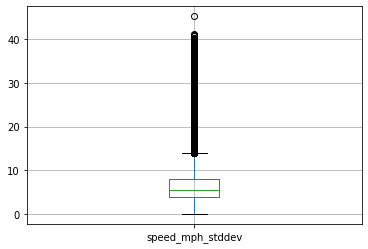

In [33]:
# Choosing a range of std_deviation to delete possible wrong/not accurate data, using box plot
boxplot = oct_data.boxplot(column=['speed_mph_stddev'])

In [34]:
# The result shows that the range is from 0-16.852, which means if the data is above 16.852 that consider as a not accurate data
oct_data['speed_mph_stddev'].quantile(0.99)

16.862000000000002

In [35]:
# Filter the valid data for speed
oct_data_filter = oct_data[oct_data['speed_mph_stddev']<=16.862]
oct_data_filter

,year,month,day,hour,utc_timestamp,segment_id,start_junction_id,end_junction_id,osm_way_id,osm_start_node_id,osm_end_node_id,speed_mph_mean,speed_mph_stddev
0,2019,10,12,22,2019-10-13T05:00:00.000Z,8f4827ebed3c2e66f50daef967d5e91daadd8d98,8e555723c3dff79036c7a8c0cef6b32a80763c9f,2278ad9374ec96c35a0d769bc8a275f6355b55da,40722998,62385707,4927951349,23.978,2.054
1,2019,10,12,23,2019-10-13T06:00:00.000Z,8f4827ebed3c2e66f50daef967d5e91daadd8d98,8e555723c3dff79036c7a8c0cef6b32a80763c9f,2278ad9374ec96c35a0d769bc8a275f6355b55da,40722998,62385707,4927951349,23.598,4.015
2,2019,10,31,21,2019-11-01T04:00:00.000Z,8f4827ebed3c2e66f50daef967d5e91daadd8d98,8e555723c3dff79036c7a8c0cef6b32a80763c9f,2278ad9374ec96c35a0d769bc8a275f6355b55da,40722998,62385707,4927951349,23.600,4.117
3,2019,10,26,19,2019-10-27T02:00:00.000Z,8f4827ebed3c2e66f50daef967d5e91daadd8d98,8e555723c3dff79036c7a8c0cef6b32a80763c9f,2278ad9374ec96c35a0d769bc8a275f6355b55da,40722998,62385707,4927951349,19.897,1.673
4,2019,10,26,21,2019-10-27T04:00:00.000Z,8f4827ebed3c2e66f50daef967d5e91daadd8d98,8e555723c3dff79036c7a8c0cef6b32a80763c9f,2278ad9374ec96c35a0d769bc8a275f6355b55da,40722998,62385707,4927951349,24.199,2.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29063249,2019,10,10,7,2019-10-10T14:00:00.000Z,3d6c48a0525bc8c4a280d8d7db454ea636995785,d022dd919423ab6f6fa3b931626e963688bc6e3f,b1bd585154be2612e1c595e1531a4d620241ac8c,417106274,5492118867,53039690,41.045,5.090
29063250,2019,10,17,9,2019-10-17T16:00:00.000Z,3d6c48a0525bc8c4a280d8d7db454ea636995785,d022dd919423ab6f6fa3b931626e963688bc6e3f,b1bd585154be2612e1c595e1531a4d620241ac8c,417106274,5492118867,53039690,38.872,3.445
29063251,2019,10,19,22,2019-10-20T05:00:00.000Z,3d6c48a0525bc8c4a280d8d7db454ea636995785,d022dd919423ab6f6fa3b931626e963688bc6e3f,b1bd585154be2612e1c595e1531a4d620241ac8c,417106274,5492118867,53039690,40.325,7.954
29063252,2019,10,21,9,2019-10-21T16:00:00.000Z,3d6c48a0525bc8c4a280d8d7db454ea636995785,d022dd919423ab6f6fa3b931626e963688bc6e3f,b1bd585154be2612e1c595e1531a4d620241ac8c,417106274,5492118867,53039690,36.789,2.773


In [36]:
# Assign the weekday of each row.
from datetime import date
import calendar
oct_data_filter = oct_data_filter.assign(Date=pd.to_datetime(oct_data_filter[['year', 'month','day']]))
oct_data_filter['weekday'] = oct_data_filter['Date'].dt.day_name()

In [37]:
#Group by osm_way_id,weekday and hour to create the mean speed of each open street map way
mean_speed_rd = oct_data_filter.groupby(['osm_way_id','weekday','hour']).mean()[['speed_mph_mean']]
mean_speed_rd

speed_mph_mean
osm_way_id weekday   hour                
4304424    Friday    8          34.344333
                     9          34.157000
                     10         33.377667
                     11         32.288000
                     12         35.568000
...                                   ...
700434986  Wednesday 19         64.170200
                     20         65.557200
                     21         67.174400
                     22         67.932200
                     23         68.078600

[4636618 rows x 1 columns]

<h2> Part II. Join uber movement data with open street map data use OSMnx

In [39]:
# 1. Import libraries
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from IPython.display import IFrame
ox.config(log_console=True, use_cache=True)
import matplotlib.cm as cm
import matplotlib.colors as colors
from IPython.display import Image
from pprint import pprint

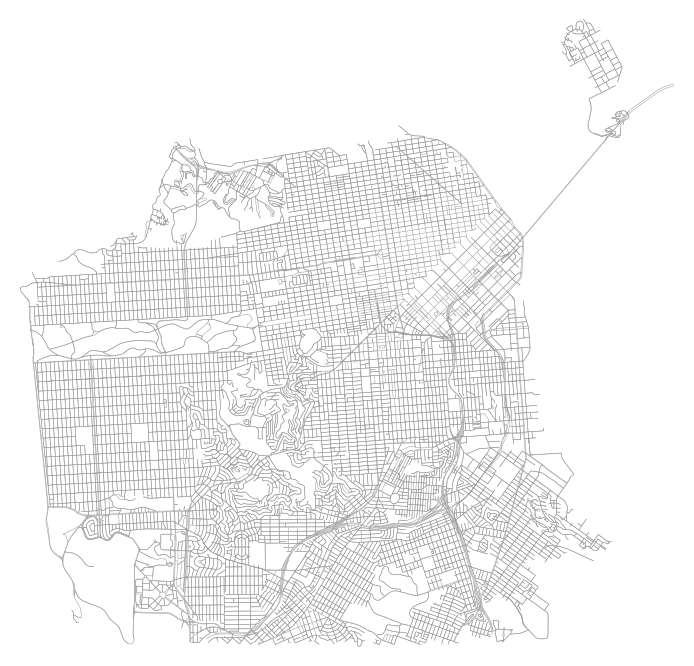

In [40]:
#2. Load San Francisco data 
place = {'city' : 'San Francisco',
         'state' : 'California',
         'country' : 'USA'}
G = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.5)

In [60]:
#3.retrieving the road information
G = ox.graph_from_place(place, network_type='drive',simplify=False)
G_simpl = ox.simplify_graph(G, strict=False)
G_proj = ox.project_graph(G_simpl,to_crs={'proj':'longlat','epsg':'32750' ,'ellps':'WGS84', 'datum':'WGS84'})

segments = ox.graph_to_gdfs(G_proj, nodes=False, edges=True)
segments.columns

Index(['u', 'v', 'key', 'osmid', 'maxspeed', 'name', 'highway', 'oneway',
       'length', 'geometry', 'lanes', 'access', 'ref', 'bridge', 'tunnel',
       'service', 'junction', 'width'],
      dtype='object')

In [70]:
segments.head()

,u,v,key,osmid,maxspeed,name,highway,oneway,length,geometry,lanes,access,ref,bridge,tunnel,service,junction,width
0,287834139,65312832,0,133743842,25 mph,Dewey Boulevard,secondary,True,11.204,"LINESTRING (-122.45927 37.74722, -122.45914 37...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,287834139,6902779320,0,503825191,NaN,Laguna Honda Boulevard,secondary,True,12.120,"LINESTRING (-122.45927 37.74722, -122.45918 37...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,287834139,65326296,0,737961441,25 mph,Dewey Boulevard,tertiary,False,261.302,"LINESTRING (-122.45927 37.74722, -122.45945 37...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65337375,65359314,0,25372358,NaN,Sansome Street,tertiary,False,102.552,"LINESTRING (-122.40187 37.79663, -122.40186 37...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65337375,3836814558,0,425516652,NaN,Sansome Street,tertiary,False,49.126,"LINESTRING (-122.40187 37.79663, -122.40188 37...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
#3.1 See the road that with maxspeed report
segments_maxspeed = segments[['osmid','highway','maxspeed']]
segments_maxspeed = segments_maxspeed.dropna()
segments_maxspeed 

,osmid,highway,maxspeed
0,133743842,secondary,25 mph
2,737961441,tertiary,25 mph
10,255178055,tertiary,25 mph
11,255178055,tertiary,25 mph
12,437558596,primary,25 mph
...,...,...,...
31304,8917611,tertiary,30 mph
31305,620169740,unclassified,20 mph
31321,516185201,secondary,40 mph
31326,514412271,secondary,35 mph


In [61]:
#4. Join the road speed data to segments by osm_way_id
mean_speed_rd2 = mean_speed_rd.reset_index().rename(columns = {'osm_way_id':'osmid'})
segments_join = segments.merge(mean_speed_rd2, on ='osmid')

In [71]:
segments_join.head()

,u,v,key,osmid,maxspeed,name,highway,oneway,length,geometry,...,access,ref,bridge,tunnel,service,junction,width,weekday,hour,speed_mph_mean
0,287834139,65312832,0,133743842,25 mph,Dewey Boulevard,secondary,True,11.204,"LINESTRING (-122.45927 37.74722, -122.45914 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,7,19.752500
1,287834139,65312832,0,133743842,25 mph,Dewey Boulevard,secondary,True,11.204,"LINESTRING (-122.45927 37.74722, -122.45914 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,8,18.967667
2,287834139,65312832,0,133743842,25 mph,Dewey Boulevard,secondary,True,11.204,"LINESTRING (-122.45927 37.74722, -122.45914 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,9,21.740000
3,287834139,65312832,0,133743842,25 mph,Dewey Boulevard,secondary,True,11.204,"LINESTRING (-122.45927 37.74722, -122.45914 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,10,18.394250
4,287834139,65312832,0,133743842,25 mph,Dewey Boulevard,secondary,True,11.204,"LINESTRING (-122.45927 37.74722, -122.45914 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,11,19.175250


In [74]:
#5. query specific time data, example: Friday at 9AM
Friday_9am = segments_join[(segments_join['weekday'] == 'Friday') & (segments_join['hour'] == 9)]
#5.2 Group by osmid
Friday_9am_group = Friday_9am.groupby('osmid').mean()[['speed_mph_mean']]
Friday_9am_group

,speed_mph_mean
osmid,
5071582,51.120000
7373728,12.573333
7373736,12.806917
8914974,15.714000
8914988,20.321000
...,...
694654073,18.227296
694654074,16.301500
694654075,23.270778


In [75]:
#6. Rejoin the data to original segments
Friday_9am_group = Friday_9am_group.reset_index()
segments_query = segments.merge(Friday_9am_group, on ='osmid',how = 'left')
#6.2 fill NaN with 0, need to be discuss in the future,maybe set the speed as maxspeed?
segments_query['speed_mph_mean'] = segments_query['speed_mph_mean'].fillna(0)
segments_query

,u,v,key,osmid,maxspeed,name,highway,oneway,length,geometry,lanes,access,ref,bridge,tunnel,service,junction,width,speed_mph_mean
0,287834139,65312832,0,133743842,25 mph,Dewey Boulevard,secondary,True,11.204,"LINESTRING (-122.45927 37.74722, -122.45914 37...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.740000
1,287834139,6902779320,0,503825191,NaN,Laguna Honda Boulevard,secondary,True,12.120,"LINESTRING (-122.45927 37.74722, -122.45918 37...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.372000
2,287834139,65326296,0,737961441,25 mph,Dewey Boulevard,tertiary,False,261.302,"LINESTRING (-122.45927 37.74722, -122.45945 37...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,65337375,65359314,0,25372358,NaN,Sansome Street,tertiary,False,102.552,"LINESTRING (-122.40187 37.79663, -122.40186 37...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.497000
4,65337375,3836814558,0,425516652,NaN,Sansome Street,tertiary,False,49.126,"LINESTRING (-122.40187 37.79663, -122.40188 37...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.042625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31324,4784127936,6910272811,0,514729105,NaN,Fulton Street,tertiary,False,9.961,"LINESTRING (-122.44634 37.77583, -122.44645 37...",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.081250
31325,4784127936,4177279589,0,417107318,NaN,Fulton Street,tertiary,False,97.534,"LINESTRING (-122.44634 37.77583, -122.44625 37...",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.145000
31326,4784127935,65287261,0,514412271,35 mph,Fulton Street,secondary,False,8.772,"LINESTRING (-122.44664 37.77579, -122.44654 37...",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.132375
31327,4784127935,5025735414,0,514729108,35 mph,Fulton Street,secondary,False,35.675,"LINESTRING (-122.44664 37.77579, -122.44704 37...",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.583625


<h2> Part III. Visualize road speed

In [103]:
#1. Filter road that contains maxspeed
valid_road = segments_query.merge(segments_maxspeed,on = 'osmid')
valid_road['maxspeed2'] = valid_road['maxspeed_x'].str.extract('(\d+)').astype(int)
valid_road

,u,v,key,osmid,maxspeed_x,name,highway_x,oneway,length,geometry,...,ref,bridge,tunnel,service,junction,width,speed_mph_mean,highway_y,maxspeed_y,maxspeed2
0,287834139,65312832,0,133743842,25 mph,Dewey Boulevard,secondary,True,11.204,"LINESTRING (-122.45927 37.74722, -122.45914 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,21.74000,secondary,25 mph,25
1,287834139,65326296,0,737961441,25 mph,Dewey Boulevard,tertiary,False,261.302,"LINESTRING (-122.45927 37.74722, -122.45945 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,tertiary,25 mph,25
2,287834139,65326296,0,737961441,25 mph,Dewey Boulevard,tertiary,False,261.302,"LINESTRING (-122.45927 37.74722, -122.45945 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,tertiary,25 mph,25
3,65326296,287834139,0,737961441,25 mph,Dewey Boulevard,tertiary,False,261.302,"LINESTRING (-122.46139 37.74557, -122.46124 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,tertiary,25 mph,25
4,65326296,287834139,0,737961441,25 mph,Dewey Boulevard,tertiary,False,261.302,"LINESTRING (-122.46139 37.74557, -122.46124 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,tertiary,25 mph,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30772,4021550366,4021550367,0,254758133,25 mph,Valencia Street,tertiary,False,82.488,"LINESTRING (-122.42037 37.74891, -122.42033 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,15.02300,tertiary,25 mph,25
30773,4021550366,4021550367,0,254758133,25 mph,Valencia Street,tertiary,False,82.488,"LINESTRING (-122.42037 37.74891, -122.42033 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,15.02300,tertiary,25 mph,25
30774,4021550367,4021550366,0,254758133,25 mph,Valencia Street,tertiary,False,82.488,"LINESTRING (-122.42030 37.74817, -122.42031 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,15.02300,tertiary,25 mph,25
30775,4021550367,4021550366,0,254758133,25 mph,Valencia Street,tertiary,False,82.488,"LINESTRING (-122.42030 37.74817, -122.42031 37...",...,NaN,NaN,NaN,NaN,NaN,NaN,15.02300,tertiary,25 mph,25


In [120]:
2. #Using speed_mph_mean/maxspeed2 to see difference
valid_road['diff'] = valid_road['speed_mph_mean']/valid_road['maxspeed2']
# assign different line colour for different ratios
valid_road.loc[valid_road['diff'] == 0.00000, 'colour'] = 'grey' 
valid_road.loc[(valid_road['diff']>0)&(valid_road['diff']<0.8), 'colour'] = '#f60404' #red
valid_road.loc[(valid_road['diff']>=0.8)&(valid_road['diff']<1), 'colour'] = '#ffa500' #orange
valid_road.loc[(valid_road['diff']>=1)&(valid_road['diff']<1.25), 'colour'] = '#99cc99' #green
valid_road.loc[valid_road['diff']>=1.25, 'colour'] = '#b3cc99' #light green
valid_road

,u,v,key,osmid,maxspeed_x,name,highway_x,oneway,length,geometry,...,tunnel,service,junction,width,speed_mph_mean,highway_y,maxspeed_y,maxspeed2,diff,colour
0,287834139,65312832,0,133743842,25 mph,Dewey Boulevard,secondary,True,11.204,"LINESTRING (-122.45927 37.74722, -122.45914 37...",...,NaN,NaN,NaN,NaN,21.74000,secondary,25 mph,25,0.869600,#ffa500
1,287834139,65326296,0,737961441,25 mph,Dewey Boulevard,tertiary,False,261.302,"LINESTRING (-122.45927 37.74722, -122.45945 37...",...,NaN,NaN,NaN,NaN,0.00000,tertiary,25 mph,25,0.000000,grey
2,287834139,65326296,0,737961441,25 mph,Dewey Boulevard,tertiary,False,261.302,"LINESTRING (-122.45927 37.74722, -122.45945 37...",...,NaN,NaN,NaN,NaN,0.00000,tertiary,25 mph,25,0.000000,grey
3,65326296,287834139,0,737961441,25 mph,Dewey Boulevard,tertiary,False,261.302,"LINESTRING (-122.46139 37.74557, -122.46124 37...",...,NaN,NaN,NaN,NaN,0.00000,tertiary,25 mph,25,0.000000,grey
4,65326296,287834139,0,737961441,25 mph,Dewey Boulevard,tertiary,False,261.302,"LINESTRING (-122.46139 37.74557, -122.46124 37...",...,NaN,NaN,NaN,NaN,0.00000,tertiary,25 mph,25,0.000000,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30772,4021550366,4021550367,0,254758133,25 mph,Valencia Street,tertiary,False,82.488,"LINESTRING (-122.42037 37.74891, -122.42033 37...",...,NaN,NaN,NaN,NaN,15.02300,tertiary,25 mph,25,0.600920,#f60404
30773,4021550366,4021550367,0,254758133,25 mph,Valencia Street,tertiary,False,82.488,"LINESTRING (-122.42037 37.74891, -122.42033 37...",...,NaN,NaN,NaN,NaN,15.02300,tertiary,25 mph,25,0.600920,#f60404
30774,4021550367,4021550366,0,254758133,25 mph,Valencia Street,tertiary,False,82.488,"LINESTRING (-122.42030 37.74817, -122.42031 37...",...,NaN,NaN,NaN,NaN,15.02300,tertiary,25 mph,25,0.600920,#f60404
30775,4021550367,4021550366,0,254758133,25 mph,Valencia Street,tertiary,False,82.488,"LINESTRING (-122.42030 37.74817, -122.42031 37...",...,NaN,NaN,NaN,NaN,15.02300,tertiary,25 mph,25,0.600920,#f60404


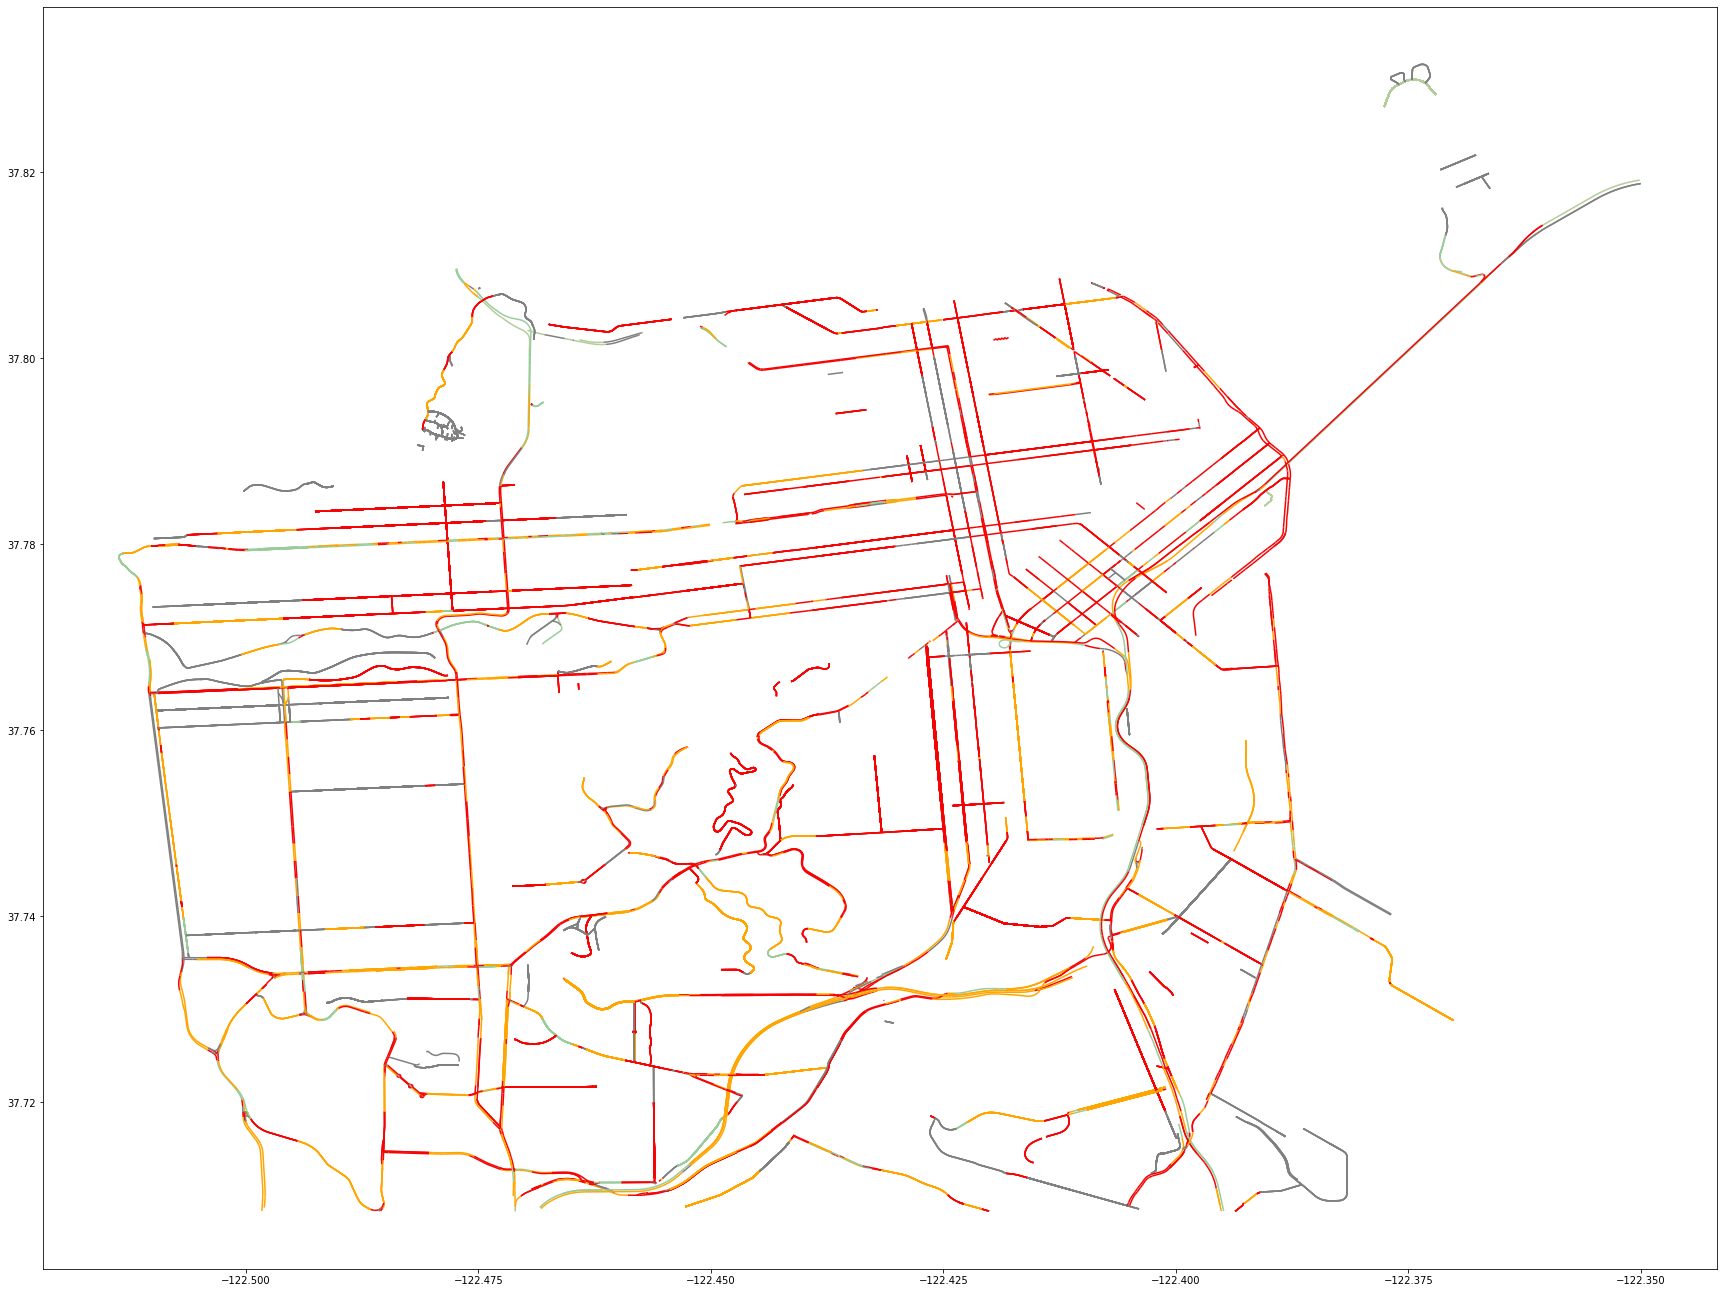

In [121]:
fig, ax = plt.subplots(figsize=(30,30))
valid_road.plot(ax=ax, linewidth=1.5, edgecolor=valid_road['colour'])
plt.show()